In [1]:
import pandas 

In [2]:
import numpy

In [3]:
import pandas as pd
import numpy as np

In [4]:
file_path=r"C:\Users\ADMIN\Downloads\Real_Estate Data.xlsx"

In [5]:
data=pd.read_excel(r"C:\Users\ADMIN\Downloads\Real_Estate Data.xlsx")

In [6]:
data

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.500,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.400,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.400,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,"Pune, Maharashtra, India",BANER,3bhk,1300 to 1400,160,16.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
196,197,"Pune, Maharashtra, India",BANER,4bhk,1600 +,230,23.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
197,198,"Pune, Maharashtra, India",BANER,2 bhk,769 to 809,95,9.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes
198,199,"Pune, Maharashtra, India",BANER,3 bhk,1101 to 1113,135,13.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes


In [7]:
data.info

<bound method DataFrame.info of      Sr. No.                  Location   Sub-Area Propert Type  \
0          1  Pune, Maharashtra, India    Bavdhan        1 BHK   
1          2  Pune, Maharashtra, India    Bavdhan        2 BHK   
2          3  Pune, Maharashtra, India    Bavdhan        3 BHK   
3          4  Pune, Maharashtra, India    Bavdhan  3 BHK Grand   
4          5  Pune, Maharashtra, India  Mahalunge         2BHK   
..       ...                       ...        ...          ...   
195      196  Pune, Maharashtra, India      BANER         3bhk   
196      197  Pune, Maharashtra, India      BANER         4bhk   
197      198  Pune, Maharashtra, India      BANER        2 bhk   
198      199  Pune, Maharashtra, India      BANER        3 bhk   
199      200  Pune, Maharashtra, India      BANER        2bhk    

    Property Area in Sq. Ft. Price in lakhs  Price in Millions  \
0                        492             39              3.900   
1                        774             65

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [9]:

features = ['Property Area in Sq. Ft.', 'Total TownShip Area in Acres', 'Location', 'Sub-Area', 'Propert Type']
target = 'Price in Millions'

In [10]:

X = data[features]
y = data[target]

In [11]:

numeric_features = ['Property Area in Sq. Ft.', 'Total TownShip Area in Acres']
categorical_features = ['Location', 'Sub-Area', 'Propert Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:

numeric_features = ['Property Area in Sq. Ft.', 'Total TownShip Area in Acres']
for col in numeric_features:
    data[col] = pd.to_numeric(data[col], errors='coerce')



In [14]:

def bool_to_int(x):
    return 1 if x == 'Yes' or x == 'yes' else 0


In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
# Convert all columns to numeric
for column in data.columns:
    if data[column].dtype == 'object':
        if set(data[column].unique()) == {'Yes', 'No'} or set(data[column].unique()) == {'yes', 'no'}:
            data[column] = data[column].apply(bool_to_int)
        else:
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column].astype(str))
    else:
        data[column] = pd.to_numeric(data[column], errors='coerce')


In [17]:
# Fill NaN values with the mean of the column
data = data.fillna(data.mean())


In [18]:
# Select features for the model (excluding the target variable)
features = data.columns.drop('Price in Millions')
target = 'Price in Millions'


In [19]:
# Prepare the data
X = data[features]
y = data[target]


In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [22]:

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [23]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    return train_mse, test_mse, train_r2, test_r2

linear_metrics = evaluate_model(linear_model, X_train, X_test, y_train, y_test)
poly_metrics = evaluate_model(poly_model, X_train_poly, X_test_poly, y_train, y_test)


In [24]:
print("Linear Regression Metrics:")
print(f"Training MSE: {linear_metrics[0]:.4f}")
print(f"Test MSE: {linear_metrics[1]:.4f}")
print(f"Training R2: {linear_metrics[2]:.4f}")
print(f"Test R2: {linear_metrics[3]:.4f}")


Linear Regression Metrics:
Training MSE: 79.4722
Test MSE: 28.3756
Training R2: 0.3031
Test R2: 0.5065


In [25]:
print("\nPolynomial Regression Metrics:")
print(f"Training MSE: {poly_metrics[0]:.4f}")
print(f"Test MSE: {poly_metrics[1]:.4f}")
print(f"Training R2: {poly_metrics[2]:.4f}")
print(f"Test R2: {poly_metrics[3]:.4f}")


Polynomial Regression Metrics:
Training MSE: 11.0669
Test MSE: 18595339.3755
Training R2: 0.9029
Test R2: -323408.1472


PLOTING THE LINEAR AND POLYNOMIAL REGRESSION

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay


In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [30]:

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [31]:

def plot_partial_dependence_linear(feature_names, X, model):
    fig, axes = plt.subplots(len(feature_names), 1, figsize=(10, 5*len(feature_names)))
    fig.suptitle("Partial Dependence Plots - Linear Model", fontsize=16)

    for i, feature in enumerate(feature_names):
        ax = axes[i] if len(feature_names) > 1 else axes
        PartialDependenceDisplay.from_estimator(model, X, [feature], ax=ax)
        ax.set_title(f"Linear: {feature}")

    plt.tight_layout()
    plt.show()

In [32]:

def plot_partial_dependence_poly(feature_names, X, model, poly_features):
    fig, axes = plt.subplots(len(feature_names), 1, figsize=(10, 5*len(feature_names)))
    fig.suptitle("Partial Dependence Plots - Polynomial Model", fontsize=16)

    X_poly = poly_features.transform(X)
    feature_names_poly = poly_features.get_feature_names_out(feature_names)

    for i, feature in enumerate(feature_names):
        ax = axes[i] if len(feature_names) > 1 else axes
        poly_feature_indices = [j for j, name in enumerate(feature_names_poly) if feature in name]
        PartialDependenceDisplay.from_estimator(model, X_poly, features=poly_feature_indices, ax=ax)
        ax.set_title(f"Polynomial: {feature}")

    plt.tight_layout()
    plt.show()


In [33]:

features_to_plot = ['Property Area in Sq. Ft.', 'Total TownShip Area in Acres', 'Sr. No.', 'Price in lakhs']


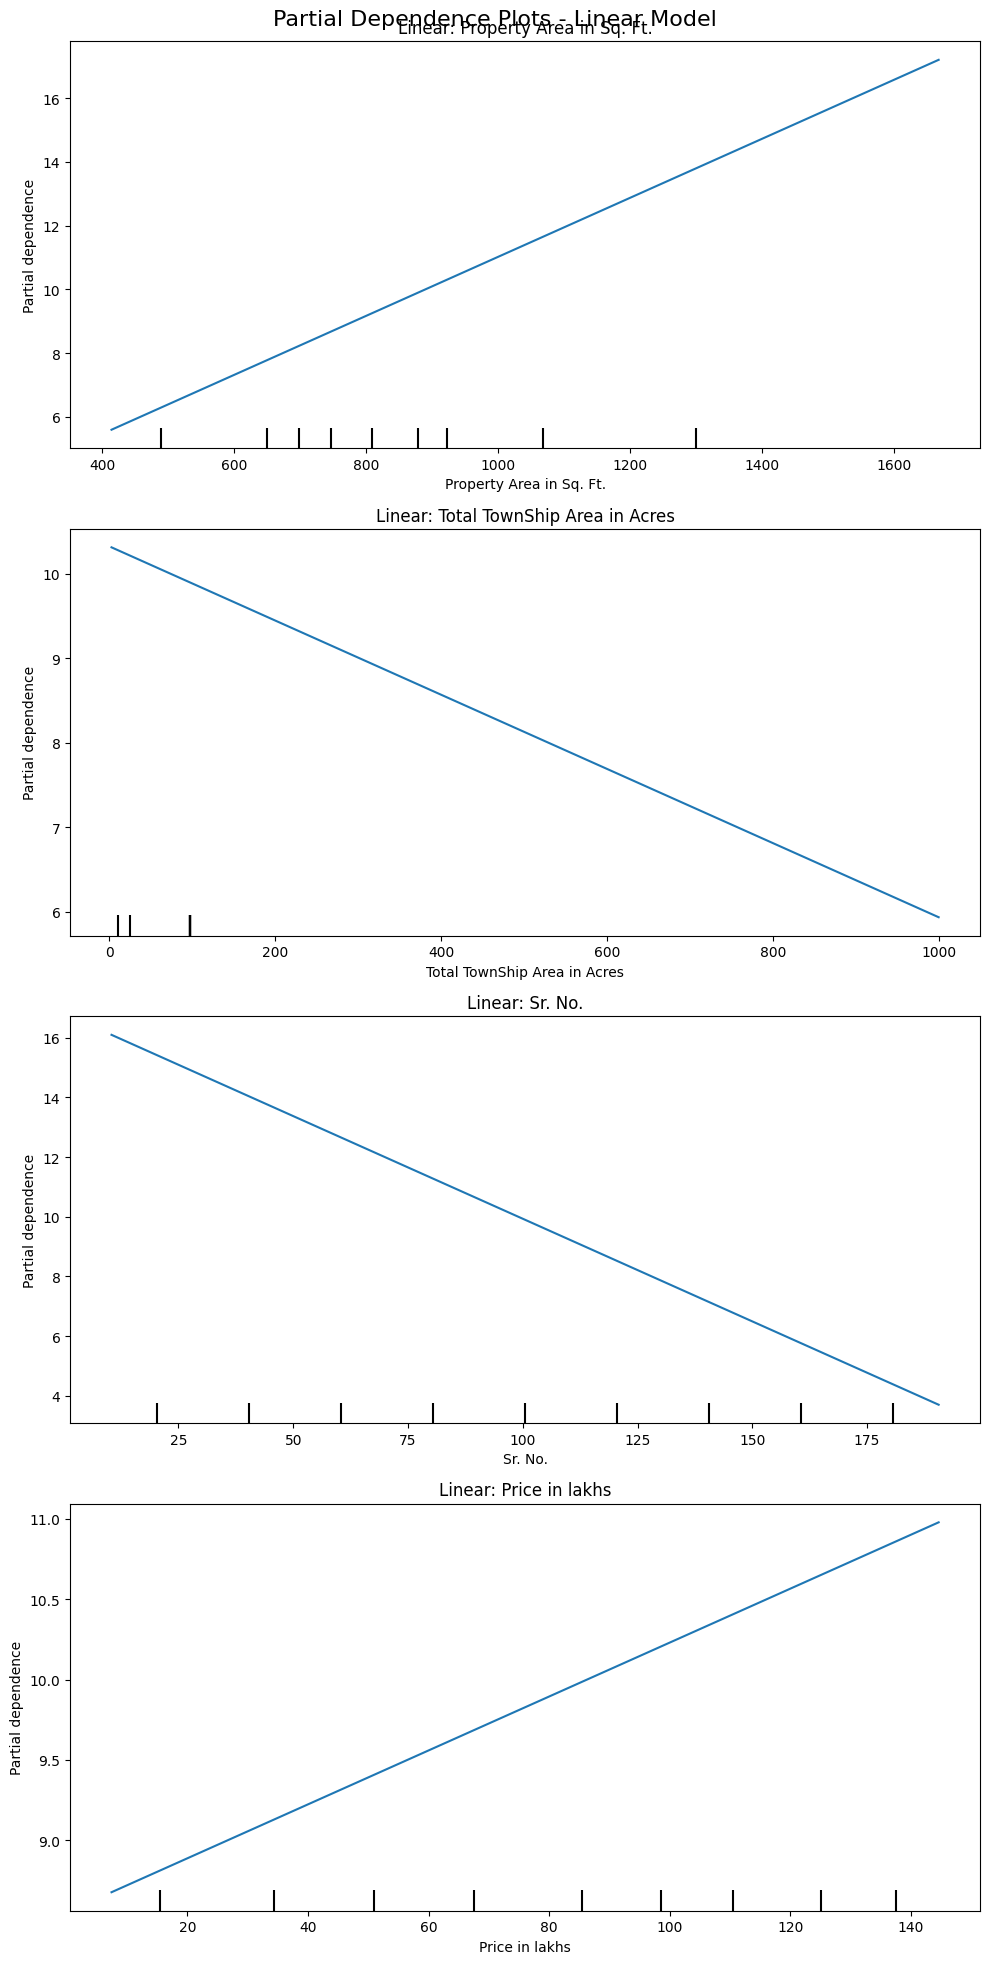

In [34]:

plot_partial_dependence_linear(features_to_plot, X, linear_model)


In [35]:
print("Original feature names:")
print(X.columns)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_feature_names = poly_features.get_feature_names_out(X.columns)

print("\nPolynomial feature names:")
print(poly_feature_names)

print(f"\nShape of X: {X.shape}")
print(f"Shape of X_poly: {X_poly.shape}")

Original feature names:
Index(['Sr. No.', 'Location', 'Sub-Area', 'Propert Type',
       'Property Area in Sq. Ft.', 'Price in lakhs', 'Company Name',
       'TownShip Name/ Society Name', 'Total TownShip Area in Acres',
       'ClubHouse', 'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym'],
      dtype='object')

Polynomial feature names:
['Sr. No.' 'Location' 'Sub-Area' 'Propert Type' 'Property Area in Sq. Ft.'
 'Price in lakhs' 'Company Name' 'TownShip Name/ Society Name'
 'Total TownShip Area in Acres' 'ClubHouse'
 'School / University in Township ' 'Hospital in TownShip'
 'Mall in TownShip' 'Park / Jogging track' 'Swimming Pool' 'Gym'
 'Sr. No.^2' 'Sr. No. Location' 'Sr. No. Sub-Area' 'Sr. No. Propert Type'
 'Sr. No. Property Area in Sq. Ft.' 'Sr. No. Price in lakhs'
 'Sr. No. Company Name' 'Sr. No. TownShip Name/ Society Name'
 'Sr. No. Total TownShip Area in Acres' 'Sr. No. ClubHouse'
 'Sr. No. S

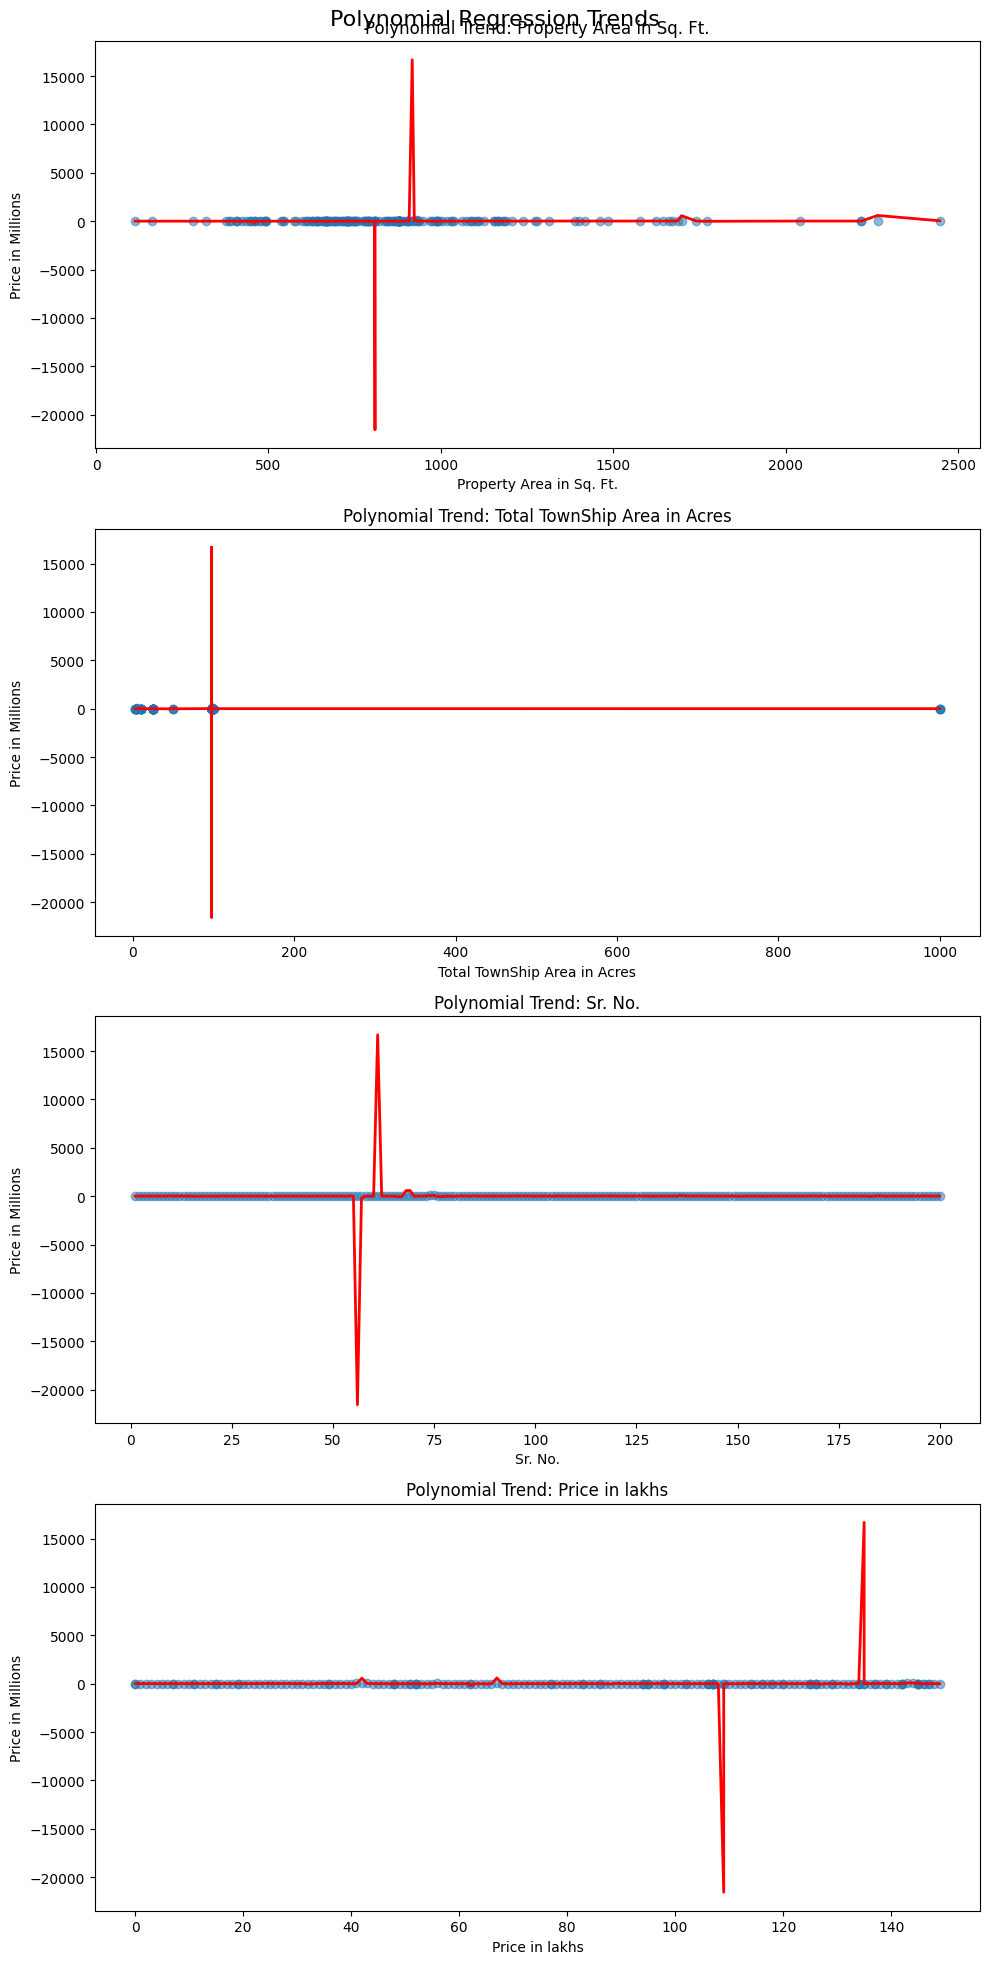

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polynomial_trends(feature_names, X, y, poly_model, poly_features):
    X_poly = poly_features.transform(X)
    y_pred = poly_model.predict(X_poly)

    fig, axes = plt.subplots(len(feature_names), 1, figsize=(10, 5*len(feature_names)))
    fig.suptitle("Polynomial Regression Trends", fontsize=16)

    for i, feature in enumerate(feature_names):
        ax = axes[i] if len(feature_names) > 1 else axes
        
        
        ax.scatter(X[feature], y, alpha=0.5)
        
    
        sort_idx = np.argsort(X[feature])
        x_sorted = X[feature].iloc[sort_idx]
        y_pred_sorted = y_pred[sort_idx]
        
    
        ax.plot(x_sorted, y_pred_sorted, color='red', linewidth=2)
        
        ax.set_xlabel(feature)
        ax.set_ylabel('Price in Millions')
        ax.set_title(f"Polynomial Trend: {feature}")

    plt.tight_layout()
    plt.show()
    
plot_polynomial_trends(features_to_plot, X, y, poly_model, poly_features)